In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\jordi\AppData\Local\Temp\ipykernel_5620\3271411007.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nombreEq', y='partidos_ganados', data=data, palette=palette)
C:\Users\jordi\AppData\Local\Temp\ipykernel_5620\3271411007.py:13: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.barplot(x='nombreEq', y='partidos_ganados', data=data, palette=palette)


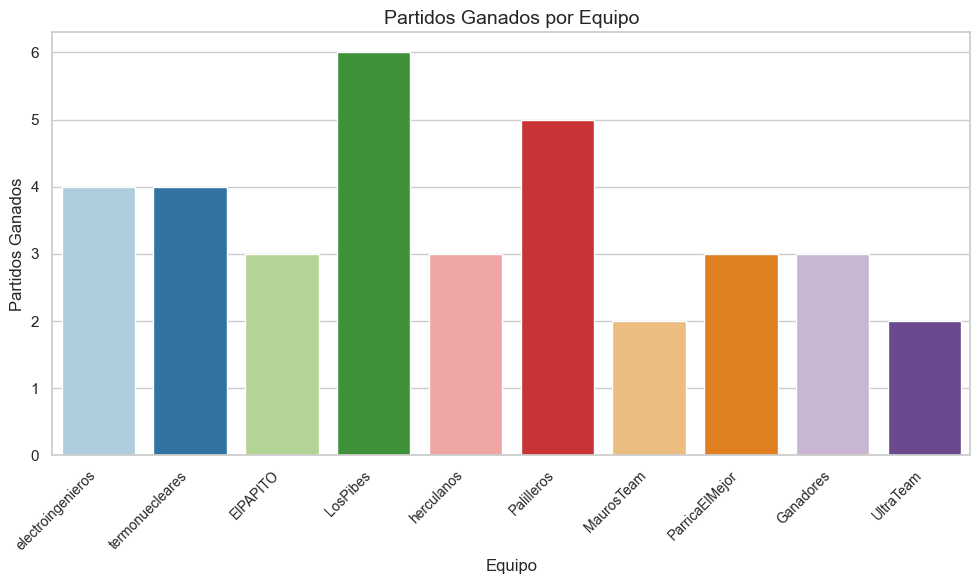

C:\Users\jordi\AppData\Local\Temp\ipykernel_5620\3271411007.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nombreEq', y='partidos_perdidos', data=data, palette=palette)
C:\Users\jordi\AppData\Local\Temp\ipykernel_5620\3271411007.py:23: UserWarning: The palette list has more values (12) than needed (10), which may not be intended.
  sns.barplot(x='nombreEq', y='partidos_perdidos', data=data, palette=palette)


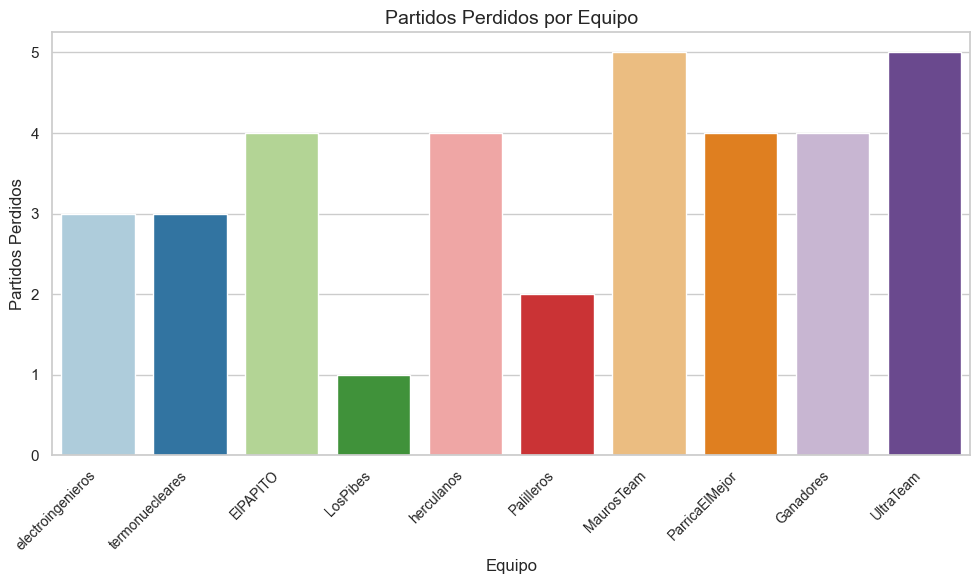

C:\Users\jordi\AppData\Local\Temp\ipykernel_5620\3271411007.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='puntos', y='dineroGenerado', data=data, palette=palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: tight_layout() takes 0 positional arguments but 1 was given

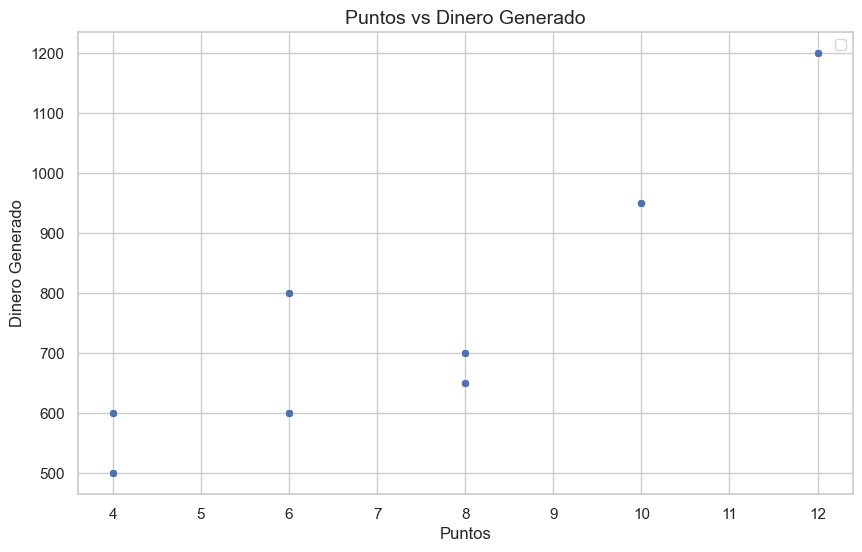

In [13]:


# Cargar datos desde el archivo CSV
data = pd.read_csv('padelWorldCupDicc.csv')

# Convertir la columna 'enfrentamientos' de string a lista de Python
data['enfrentamientos'] = data['enfrentamientos'].apply(eval)

# Configuración de estilo
sns.set(style="whitegrid")
palette = sns.color_palette("Paired")

# Gráfico de barras de partidos ganados por equipo
plt.figure(figsize=(10, 6))
sns.barplot(x='nombreEq', y='partidos_ganados', data=data, palette=palette)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Partidos Ganados por Equipo', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Partidos Ganados', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico de barras de partidos perdidos por equipo
plt.figure(figsize=(10, 6))
sns.barplot(x='nombreEq', y='partidos_perdidos', data=data, palette=palette)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Partidos Perdidos por Equipo', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Partidos Perdidos', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico de dispersión de puntos vs dinero generado
plt.figure(figsize=(10, 6))
sns.scatterplot(x='puntos', y='dineroGenerado', data=data, palette=palette)
plt.title('Puntos vs Dinero Generado', fontsize=14)
plt.xlabel('Puntos', fontsize=12)
plt.ylabel('Dinero Generado', fontsize=12)
plt.legend(title='', fontsize=10)
plt.tight_layout('puntos vs dinero generado')
plt.show()

# Gráfico de barras de media de espectadores por equipo
plt.figure(figsize=(10, 6))
sns.barplot(x='nombreEq', y='mediaEspectadoresPorEquipo', data=data, palette=palette)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Media de Espectadores por Equipo', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Media de Espectadores', fontsize=12)
plt.tight_layout()
plt.show()

# Gráfico de barras de entradas vendidas por equipo

